In [1]:
import os.path as op
import sys
sys.path.append(op.abspath('../../'))

sys.path.append(op.abspath('../../../'))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import models
import var, fcts

from project import files, defs, col, normalize
from lib import data, plot as lp, bdt as lBDT

import hdbscan

In [3]:
import lib.rootdata as lrd
import lib.plot as lp

In [4]:
from scripts.clustering import data_cuts

In [5]:
run = "00405127"
num = "0644" # id of the file for the given run

# Eta and layer to keep
# eta = 0.05
# layer = 0
eta = None
layer = 2

In [6]:
file_path = files.get_path_run_num(run=run, num=num)

# Given {rapidity} and given {layer}
dataframe = lrd.load_ROOT_into_dataframe(
    file_path, 
    tree_name=defs.unproc_tree_name,
    variables=defs.unproc_kept_variables,
    cut=files.get_cut(eta=eta, layer=layer),
)

/mnt/c/900GeV/
Number of events in the dataframe 5819520
Time taken to load the ROOT files: 29.415056228637695
ROOT files loaded: /mnt/c/900GeV/00405127/atlas/data21_900GeV.00405127.physics_L1Calo.merge.RAW._lb0644._SFO-ALL._0001.root


In [7]:
dataframe = files.process_dataframe(dataframe)
dataframe = files.compute_voi(
    dataframe,
    ['std_pos', 'std_neg','max','min'])
column_labels = col.compute_all_columns(
        dataframe, 
        ['min_std_pos_neg', 'min_std_pos_neg_redpn'],
        peak_voi=True,
        threshold_voi=True
    )
data_cuts.apply_signal_cuts(dataframe)


Remove NaN events
5196 events removed out of 5819520 -> efficiency 0.0008928571428571428
Time taken: 52.86364936828613
Time taken: 43.20264744758606
Time taken: 15.84952425956726


/home/bunwe/ml4ltdb/project/files.py:549: RuntimeWarning: invalid value encountered in true_divide
  samples_array0_red = samples_array0 / np.array(


Time taken: 18.590633869171143
Cut pos_first_neg_after_max!=-1 -> efficiency 0.02149541503272077
Cut min_std_pos_neg_redpn > 0.02 -> efficiency 0.5124284596071766
Cut nb_peaks_sup_80_wrt_min == 1 -> efficiency 0.7275469534980559
Cut pos_max <= 20 -> efficiency 0.28711371172844896


In [10]:
dataframe

channelId  layer     eta       phi  ieta  iphi  region     s0     s1  \
2        956379136      2  0.0625  0.046019     2     0       0  873.0  873.0   
20       956385792      2  0.2125  0.144194     8     1       0  887.0  888.0   
21       956386816      2  0.2375  0.144194     9     1       0  880.0  880.0   
34       956399616      2  0.5625  0.046019    22     0       0  906.0  905.0   
35       956400640      2  0.5875  0.046019    23     0       0  900.0  900.0   
...            ...    ...     ...       ...   ...   ...     ...    ...    ...   
5819455  981227008      2 -2.8000 -0.879482     1    27       0  500.0  500.0   
5819493  981268992      2 -2.4625 -0.241346    41    61       1  861.0  860.0   
5819500  981259264      2 -2.4375 -0.535871    40    58       1  850.0  850.0   
5819510  981276160      2 -2.4875 -0.437696    42    59       1  824.0  824.0   
5819516  981278208      2 -2.4875 -0.044997    42    63       1  846.0  846.0   

            s2  ...  min_std_pos_neg  min_std_pos_neg_redpn  pedestal  \
2        873.0  ...         0.306186               0.436492     873.0   
20       886.0  ...         0.176777               0.172538     887.0   
21       880.0  ...         0.176777               0.200000     880.0   
34       906.0  ...         0.176777               0.179129     906.0   
35       900.0  ...         0.176777               0.182744     900.0   
...        ...  ...              ...                    ...       ...   
5819455  500.0  ...         0.176777               0.500000     500.0   
5819493  861.0  ...         0.176777               0.231662     861.0   
5819500  850.0  ...         0.176777               0.500000     850.0   
5819510  824.0  ...         0.176777               0.274292     824.0   
5819516  846.0  ...         0.176777               0.500000     846.0   

              mean       std  pos_max  pos_first_neg_after_max  \
2        873.00000  0.500000        5                        6   
20       886.31250  0.526634        1                        2   
21       880.40625  0.605154        8                       10   
34       905.56250  0.704339        4                        6   
35       899.46875  0.611575        5                        7   
...            ...       ...      ...                      ...   
5819455  500.00000  0.250000        9                       10   
5819493  860.68750  0.526634        6                       12   
5819500  850.00000  0.250000        7                        8   
5819510  823.81250  0.463512       14                       22   
5819516  846.00000  0.250000        9                       10   

         mean_before_end_peak  mean_after_end_peak  nb_peaks_sup_80_wrt_min  
2                    0.666667            -0.153846                        1  
20                   2.254885            -0.150326                        1  
21                   0.154919            -0.070418                        1  
34                   0.621150            -0.143342                        1  
35                   1.102249            -0.308630                        1  
...                       ...                  ...                      ...  
5819455              0.400000            -0.181818                        1  
5819493              0.435153            -0.261092                        1  
5819500              0.500000            -0.166667                        1  
5819510              0.208389            -0.458456                        1  
5819516              0.400000            -0.181818                        1  

[538741 rows x 53 columns]

In [17]:
dataframe.query("min_std_pos_neg == 0.1767766952966369")

channelId  layer     eta       phi  ieta  iphi  region     s0     s1  \
20       956385792      2  0.2125  0.144194     8     1       0  887.0  888.0   
21       956386816      2  0.2375  0.144194     9     1       0  880.0  880.0   
34       956399616      2  0.5625  0.046019    22     0       0  906.0  905.0   
35       956400640      2  0.5875  0.046019    23     0       0  900.0  900.0   
38       956400128      2  0.5625  0.144194    22     1       0  840.0  840.0   
...            ...    ...     ...       ...   ...   ...     ...    ...    ...   
5819455  981227008      2 -2.8000 -0.879482     1    27       0  500.0  500.0   
5819493  981268992      2 -2.4625 -0.241346    41    61       1  861.0  860.0   
5819500  981259264      2 -2.4375 -0.535871    40    58       1  850.0  850.0   
5819510  981276160      2 -2.4875 -0.437696    42    59       1  824.0  824.0   
5819516  981278208      2 -2.4875 -0.044997    42    63       1  846.0  846.0   

            s2  ...  min_std_pos_neg  min_std_pos_neg_redpn  pedestal  \
20       886.0  ...         0.176777               0.172538     887.0   
21       880.0  ...         0.176777               0.200000     880.0   
34       906.0  ...         0.176777               0.179129     906.0   
35       900.0  ...         0.176777               0.182744     900.0   
38       840.0  ...         0.176777               0.231662     840.0   
...        ...  ...              ...                    ...       ...   
5819455  500.0  ...         0.176777               0.500000     500.0   
5819493  861.0  ...         0.176777               0.231662     861.0   
5819500  850.0  ...         0.176777               0.500000     850.0   
5819510  824.0  ...         0.176777               0.274292     824.0   
5819516  846.0  ...         0.176777               0.500000     846.0   

              mean       std  pos_max  pos_first_neg_after_max  \
20       886.31250  0.526634        1                        2   
21       880.40625  0.605154        8                       10   
34       905.56250  0.704339        4                        6   
35       899.46875  0.611575        5                        7   
38       839.75000  0.559017       13                       23   
...            ...       ...      ...                      ...   
5819455  500.00000  0.250000        9                       10   
5819493  860.68750  0.526634        6                       12   
5819500  850.00000  0.250000        7                        8   
5819510  823.81250  0.463512       14                       22   
5819516  846.00000  0.250000        9                       10   

         mean_before_end_peak  mean_after_end_peak  nb_peaks_sup_80_wrt_min  
20                   2.254885            -0.150326                        1  
21                   0.154919            -0.070418                        1  
34                   0.621150            -0.143342                        1  
35                   1.102249            -0.308630                        1  
38                   0.136108            -0.347833                        1  
...                       ...                  ...                      ...  
5819455              0.400000            -0.181818                        1  
5819493              0.435153            -0.261092                        1  
5819500              0.500000            -0.166667                        1  
5819510              0.208389            -0.458456                        1  
5819516              0.400000            -0.181818                        1  

[429475 rows x 53 columns]

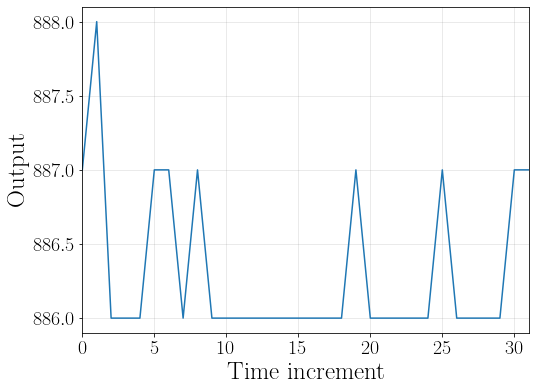

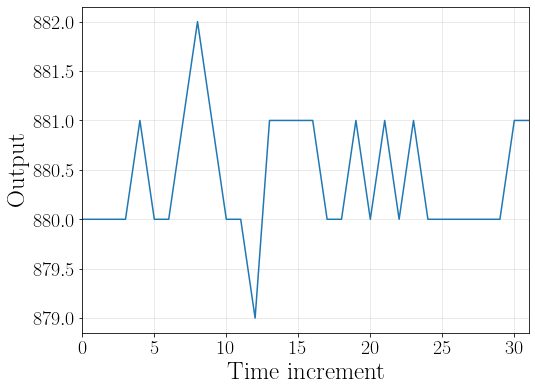

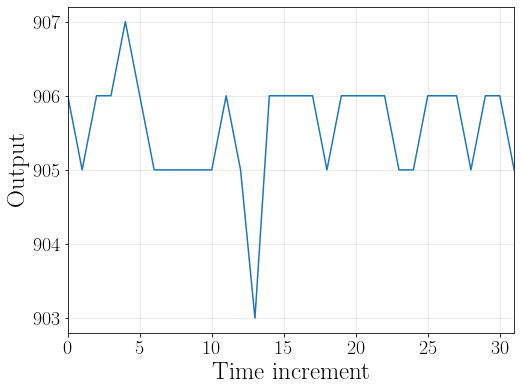

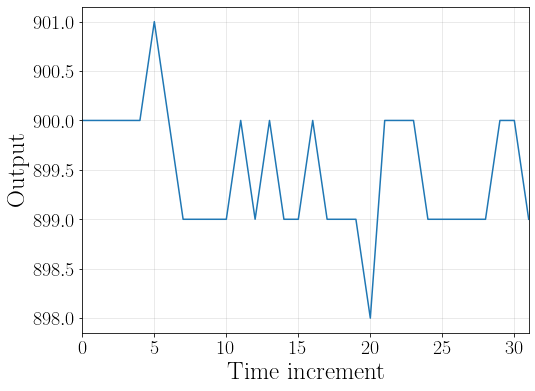

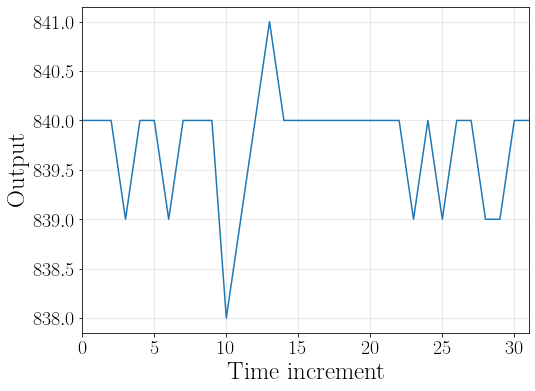

In [20]:
for i in range(5):
    lp.plot_event(dataframe.query("min_std_pos_neg == 0.1767766952966369").iloc[i])

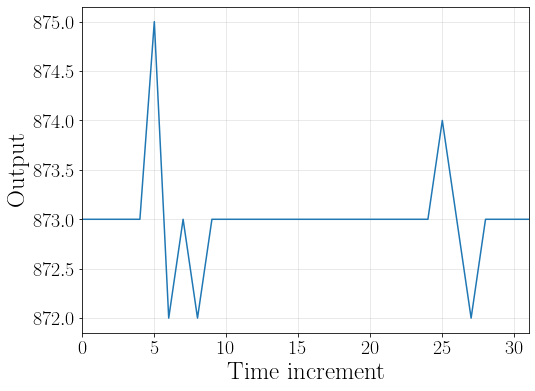

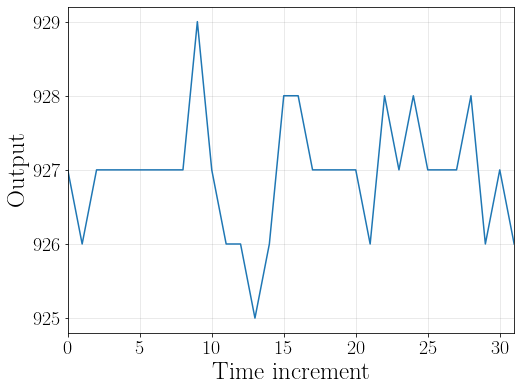

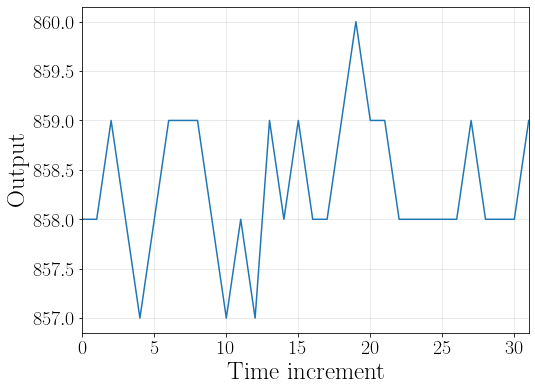

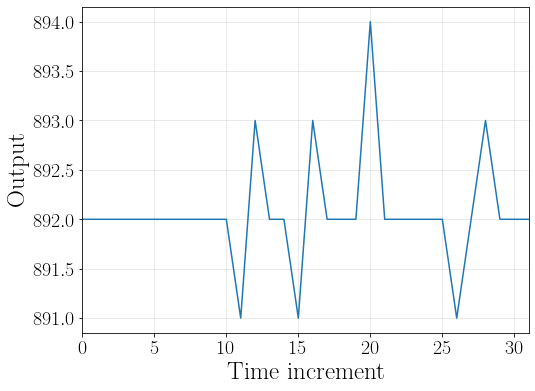

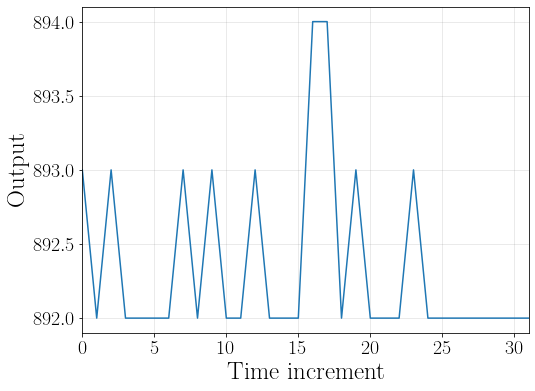

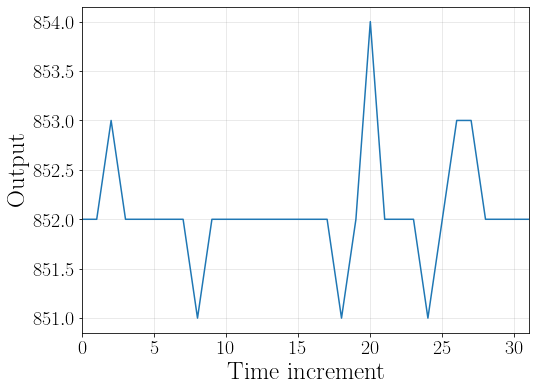

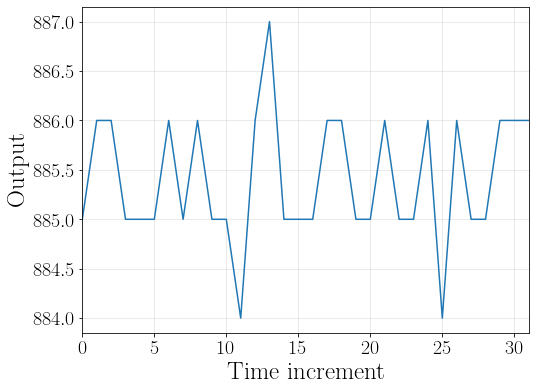

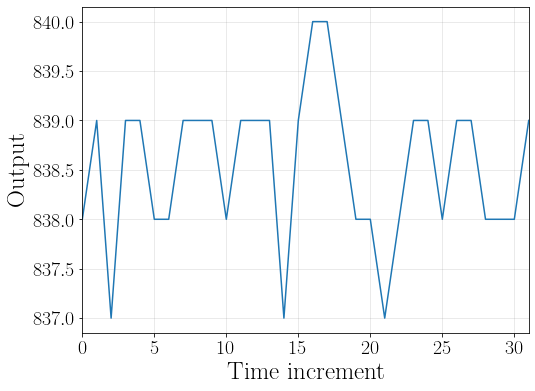

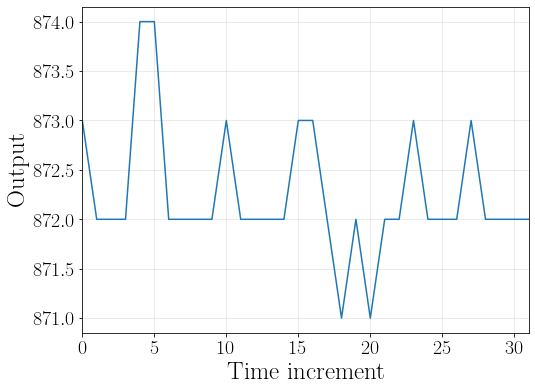

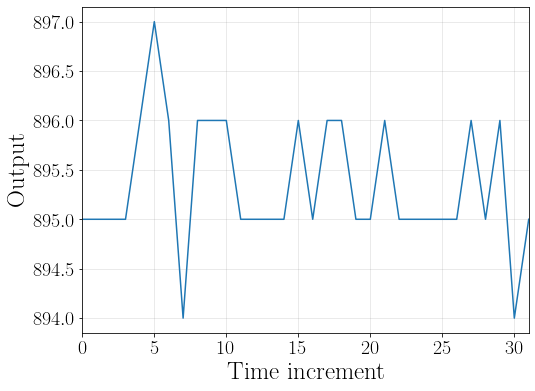

In [22]:
for i in range(10):
    lp.plot_event(dataframe.query("min_std_pos_neg != 0.1767766952966369").iloc[i])

In [27]:
samples_columns = defs.list_samples_columns + ['old_mean','old_std']
#df_for_clustering = dataframe[samples_columns]
df_for_clustering_ = dataframe.query("min_std_pos_neg != 0.1767766952966369")[defs.list_samples_columns]

In [15]:
clusterer = hdbscan.HDBSCAN(min_cluster_size = 20, min_samples = 1)
clusterer.fit(df_for_clustering)

/home/bunwe/.local/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


HDBSCAN(min_cluster_size=20, min_samples=1)

/tmp/ipykernel_1460/749147887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_clustering['hdbscan'] = clusterer.labels_


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='Hdbscan Labels', ylabel='Number of events'>)

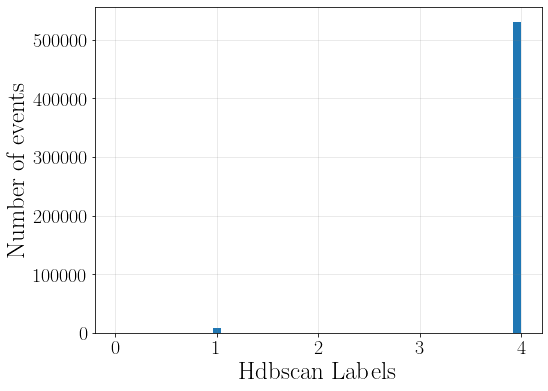

In [16]:
df_for_clustering['hdbscan'] = clusterer.labels_
lp.plot_hist(df_for_clustering['hdbscan'], 'Hdbscan Labels')

In [30]:
clusterer_ = hdbscan.HDBSCAN(min_cluster_size = 20, min_samples = 1)
clusterer_.fit(df_for_clustering_)

HDBSCAN(min_cluster_size=20, min_samples=1)

(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='Hdbscan Labels', ylabel='Number of events'>)

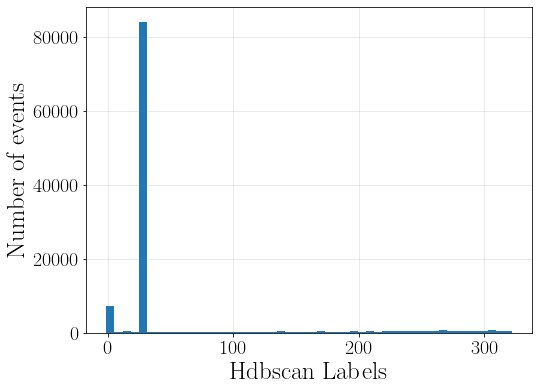

In [31]:
df_for_clustering_['hdbscan'] = clusterer_.labels_
lp.plot_hist(df_for_clustering_['hdbscan'], 'Hdbscan Labels')

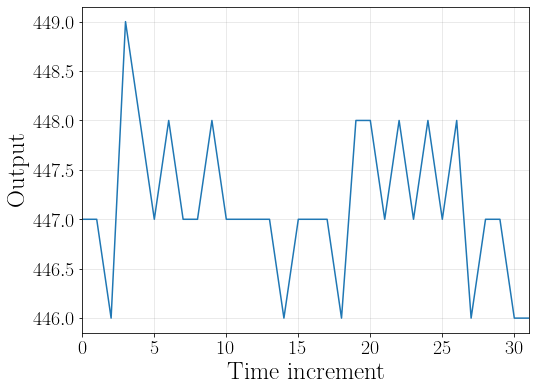

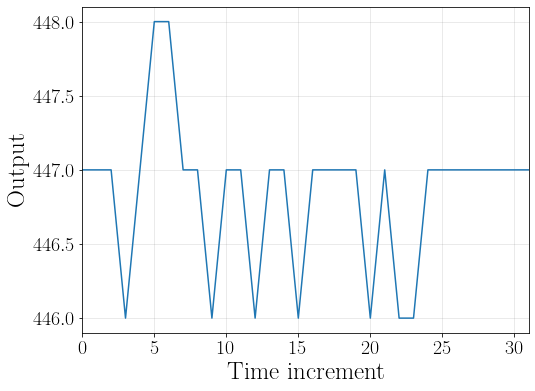

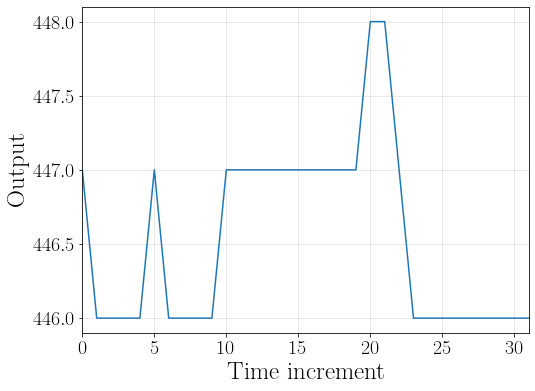

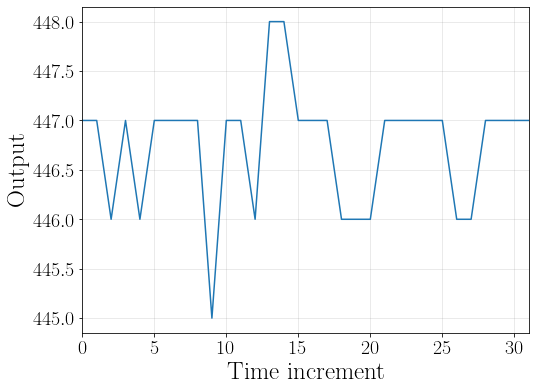

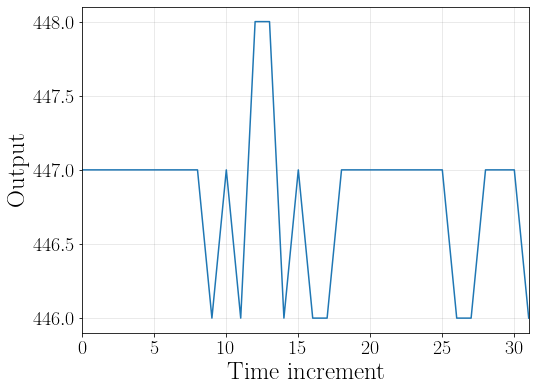

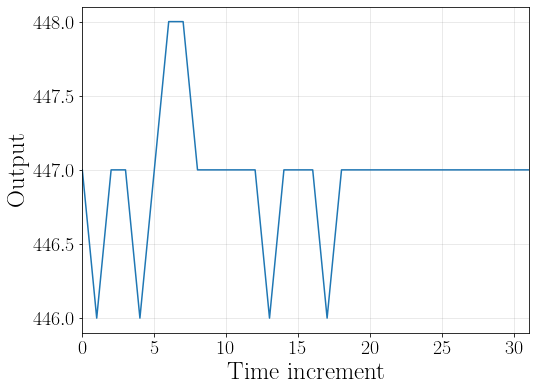

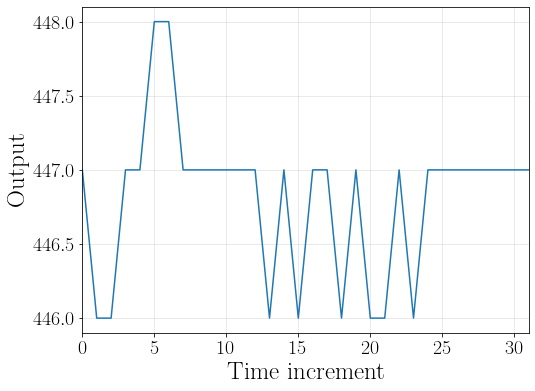

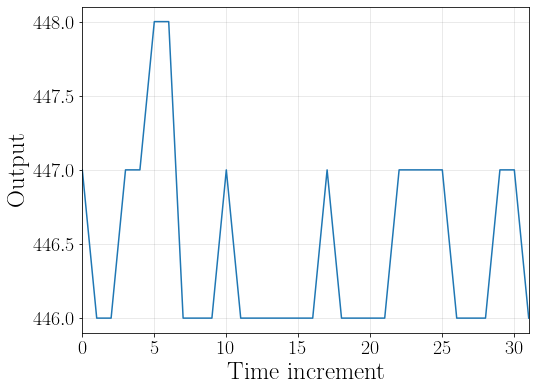

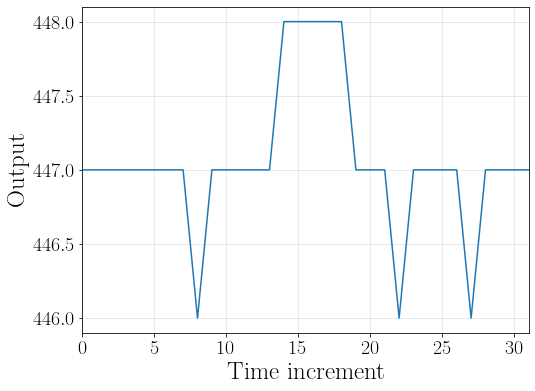

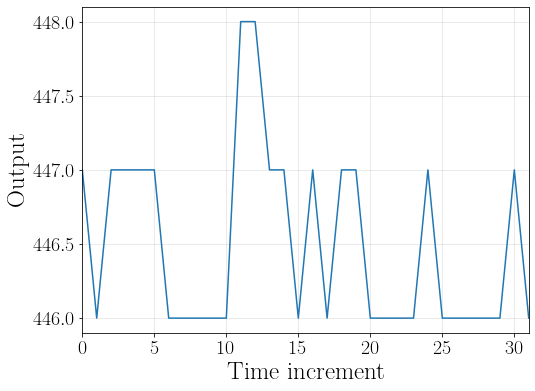

In [38]:
for i in range(10):
    lp.plot_event(df_for_clustering_.query("hdbscan == 310").iloc[i])